## **Data Cleaning**

Download Lockdown Severity Data to CSV

In [0]:
import pandas as pd

In [0]:
lockdowndata = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/stringencyindex.csv')

In [0]:
lockdowndata.head()

,Unnamed: 0,Unnamed: 1,01jan2020,02jan2020,03jan2020,04jan2020,05jan2020,06jan2020,07jan2020,08jan2020,09jan2020,10jan2020,11jan2020,12jan2020,13jan2020,14jan2020,15jan2020,16jan2020,17jan2020,18jan2020,19jan2020,20jan2020,21jan2020,22jan2020,23jan2020,24jan2020,25jan2020,26jan2020,27jan2020,28jan2020,29jan2020,30jan2020,31jan2020,01feb2020,02feb2020,03feb2020,04feb2020,05feb2020,06feb2020,07feb2020,...,29mar2020,30mar2020,31mar2020,01apr2020,02apr2020,03apr2020,04apr2020,05apr2020,06apr2020,07apr2020,08apr2020,09apr2020,10apr2020,11apr2020,12apr2020,13apr2020,14apr2020,15apr2020,16apr2020,17apr2020,18apr2020,19apr2020,20apr2020,21apr2020,22apr2020,23apr2020,24apr2020,25apr2020,26apr2020,27apr2020,28apr2020,29apr2020,30apr2020,01may2020,02may2020,03may2020,04may2020,05may2020,06may2020,07may2020
0,Aruba,ABW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,82.86000061,82.86000061,80,80,80,80,80,80,80,80,80,80,80,80,94.29000092,94.29000092,90.70999908,90.70999908,90.70999908,90.70999908
1,Afghanistan,AFG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,73.09999847,73.09999847,73.09999847,73.09999847,73.09999847,73.09999847,73.09999847,73.09999847,73.09999847,73.09999847,73.09999847,73.09999847,73.09999847,73.09999847,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,75.48000336,72.62000275,72.62000275,72.62000275,72.62000275,72.62000275,72.62000275,72.62000275
2,Angola,AGO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.710000038,5.710000038,...,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,92.37999725,84.05000305,84.05000305,84.05000305,84.05000305,84.05000305,84.05000305,84.05000305,84.05000305,84.05000305,84.05000305,84.05000305,84.05000305,84.05000305,84.05000305,84.05000305
3,Albania,ALB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,.,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786,85.23999786
4,Andorra,AND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,69.05000305,69.05000305,69.05000305,69.05000305,69.05000305,69.05000305,69.05000305,69.05000305,69.05000305,69.05000305,77.62000275,77.62000275,77.62000275,77.62000275,77.62000275,77.62000275,77.62000275,77.62000275,77.62000275,77.62000275,77.62000275,77.62000275,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305,74.05000305


In [0]:
lockdowndata.to_csv('lockdown_sevindex.csv')

Join Lockdown with Country Data

In [0]:
covid = pd.read_csv('https://raw.githubusercontent.com/lizhyde5/6070_FINALPROJECT/master/CountryCOVIDcsv.csv')

covid.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Continent
0,United States,"1,335,238",13.453,79.335,720.0,224.633,"1,031,270",16.843,4.034,240.0,"8,508,804",25.706,North America
1,Spain,262.783,2.666,26.478,179.0,173.157,63.148,1.741,5.620,566.0,"2,467,761",52.781,Europe
2,Italy,218.268,1.083,30.395,194.0,103.031,84.842,1.034,3.610,503.0,"2,514,234",41.584,Europe
3,UK,215.26,3.896,31.587,346.0,NaN,183.329,1.559,3.171,465.0,"1,728,443",25.461,Europe
4,Russia,198.676,10.817,1.827,104.0,31.916,164.933,2.300,1.361,13.0,"5,221,964",35.783,Europe


In [0]:
lockdown = pd.read_csv('https://raw.githubusercontent.com/lizhyde5/6070_FINALPROJECT/master/lockdown_severity.csv')

lockdown.head()

,Country,CountryCode,01jan2020,02jan2020,03jan2020,04jan2020,05jan2020,06jan2020,07jan2020,08jan2020,09jan2020,10jan2020,11jan2020,12jan2020,13jan2020,14jan2020,15jan2020,16jan2020,17jan2020,18jan2020,19jan2020,20jan2020,21jan2020,22jan2020,23jan2020,24jan2020,25jan2020,26jan2020,27jan2020,28jan2020,29jan2020,30jan2020,31jan2020,01feb2020,02feb2020,03feb2020,04feb2020,05feb2020,06feb2020,07feb2020,...,01apr2020,02apr2020,03apr2020,04apr2020,05apr2020,06apr2020,07apr2020,08apr2020,09apr2020,10apr2020,11apr2020,12apr2020,13apr2020,14apr2020,15apr2020,16apr2020,17apr2020,18apr2020,19apr2020,20apr2020,21apr2020,22apr2020,23apr2020,24apr2020,25apr2020,26apr2020,27apr2020,28apr2020,29apr2020,30apr2020,01may2020,02may2020,03may2020,04may2020,05may2020,06may2020,07may2020,SUM_SevIndex,Days_Not_0,Avg_LockdownSeverity
0,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,82.860001,82.860001,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,94.290001,94.290001,90.709999,90.709999,90.709999,90.709999,3882.849998,54,71.904630
1,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,73.099998,73.099998,73.099998,73.099998,73.099998,73.099998,73.099998,73.099998,73.099998,73.099998,73.099998,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,75.480003,72.620003,72.620003,72.620003,72.620003,72.620003,72.620003,72.620003,4068.010057,68,59.823677
2,Angola,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.71,5.71,...,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,92.379997,84.050003,84.050003,84.050003,84.050003,84.050003,84.050003,84.050003,84.050003,84.050003,84.050003,84.050003,84.050003,84.050003,84.050003,84.050003,4246.309971,92,46.155543
3,Albania,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,NaN,85.239998,85.239998,85.239998,85.239998,85.239998,85.239998,4911.069876,71,69.169998
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,69.050003,69.050003,69.050003,69.050003,69.050003,69.050003,69.050003,77.620003,77.620003,77.620003,77.620003,77.620003,77.620003,77.620003,77.620003,77.620003,77.620003,77.620003,77.620003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,74.050003,3716.770147,56,66.370895


In [0]:
lockdown_sev = lockdown[['Country','CountryCode','Avg_LockdownSeverity']]

lockdown_sev.head()

,Country,CountryCode,Avg_LockdownSeverity
0,Aruba,ABW,71.904630
1,Afghanistan,AFG,59.823677
2,Angola,AGO,46.155543
3,Albania,ALB,69.169998
4,Andorra,AND,66.370895


In [0]:
covid_2 = covid.merge(lockdown_sev, on='Country')

covid_2.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Continent,CountryCode,Avg_LockdownSeverity
0,United States,"1,335,238",13.453,79.335,720.0,224.633,"1,031,270",16.843,4.034,240.0,"8,508,804",25.706,North America,USA,43.989271
1,Spain,262.783,2.666,26.478,179.0,173.157,63.148,1.741,5.620,566.0,"2,467,761",52.781,Europe,ESP,57.541769
2,Italy,218.268,1.083,30.395,194.0,103.031,84.842,1.034,3.610,503.0,"2,514,234",41.584,Europe,ITA,66.564807
3,Russia,198.676,10.817,1.827,104.0,31.916,164.933,2.300,1.361,13.0,"5,221,964",35.783,Europe,RUS,50.496969
4,France,176.079,NaN,26.23,NaN,55.782,94.067,2.868,2.698,402.0,"1,384,633",21.213,Europe,FRA,56.397168


Join with World Happiness

Happy Score 2019

In [0]:
happy = pd.read_csv('https://raw.githubusercontent.com/lizhyde5/6070_FINALPROJECT/master/2019.csv')

happy.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [0]:
happydf = happy[['Country', 'Score']]

happydf.head()

,Country,Score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488


In [0]:
covid_3 = covid_2.merge(happydf, on='Country')

covid_3.head(20)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Continent,CountryCode,Avg_LockdownSeverity,Score
0,United States,"1,335,238",13.453,79.335,720.0,224.633,"1,031,270",16.843,4.034,240.0,"8,508,804",25.706,North America,USA,43.989271,6.892
1,Spain,262.783,2.666,26.478,179.0,173.157,63.148,1.741,5.620,566.0,"2,467,761",52.781,Europe,ESP,57.541769,6.354
2,Italy,218.268,1.083,30.395,194.0,103.031,84.842,1.034,3.610,503.0,"2,514,234",41.584,Europe,ITA,66.564807,6.223
3,Russia,198.676,10.817,1.827,104.0,31.916,164.933,2.300,1.361,13.0,"5,221,964",35.783,Europe,RUS,50.496969,5.648
4,France,176.079,NaN,26.23,NaN,55.782,94.067,2.868,2.698,402.0,"1,384,633",21.213,Europe,FRA,56.397168,6.592
5,Germany,171.021,433.000,7.525,15.0,143.300,20.196,1.650,2.041,90.0,"2,755,770",32.891,Europe,DEU,47.181906,6.985
6,Brazil,148.67,2.778,10.1,108.0,59.297,79.273,8.318,699.000,48.0,339.552,1.597,South America,BRA,61.949850,6.300
7,Turkey,137.115,1.546,3.739,50.0,89.480,43.896,1.168,1.626,44.0,"1,334,411",15.822,Asia,TUR,52.350856,5.373
8,Iran,106.22,1.529,6.589,48.0,85.064,14.567,2.696,1.265,78.0,573.22,6.825,Asia,IRN,60.100759,4.548
9,China,82.887,1.000,4.633,NaN,78.046,208,15.000,58.000,3.0,NaN,NaN,Asia,CHN,60.846822,5.191


**Save to CSV**

In [0]:
covid_3.to_csv('COVID_1.csv')

**Join with GDP data**

In [0]:
gdpdata = pd.read_csv('https://raw.githubusercontent.com/lizhyde5/6070_FINALPROJECT/master/GDP_perCapita_USD.csv',index_col=0)

gdpdata.head()

,GDP_2018
Country,
Afghanistan,563.8
Albania,5075.4
Algeria,4815.6
Andorra,44569.8
Angola,3229.6


In [0]:
gdpdata['Country']= gdpdata['Country'].str.lstrip()
gdpdata.head()

In [0]:
covid_5 = covid_3.merge(gdpdata, on='Country', how='left')

covid_5.head()

In [0]:
import pandas as pd

In [0]:
covid19 = pd.read_csv('https://raw.githubusercontent.com/lizhyde5/6070_FINALPROJECT/master/COVID_1.csv')

covid19.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Continent,CountryCode,Avg_LockdownSeverity,Score
0,United States,845822,27078.0,47479,2161.0,83917.0,714426,14014.0,2555,143.0,4317994.0,13045.0,North America,USA,40.443068,6.892
1,Spain,208389,4211.0,21717,435.0,85915.0,100757,7705.0,4457,464.0,930230.0,19896.0,Europe,ESP,55.374146,6.354
2,Italy,187327,3370.0,25085,437.0,54543.0,107699,2384.0,3098,415.0,1513251.0,25028.0,Europe,ITA,63.586470,6.223
3,France,159877,1827.0,21340,544.0,40657.0,97880,5218.0,2449,327.0,463662.0,7103.0,Europe,FRA,54.233999,6.592
4,Germany,150062,1609.0,5250,164.0,99400.0,45412,2908.0,1791,63.0,2072669.0,24738.0,Europe,DEU,37.770246,6.985


In [0]:
covid19.describe()

,Total Cases,New Cases,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Avg_LockdownSeverity,Score
count,120.000000,102.000000,72.000000,116.000000,120.000000,93.000000,120.000000,109.000000,1.100000e+02,110.000000,120.000000,120.000000
mean,21625.758333,728.666667,87.472222,6087.706897,14211.275000,605.086022,624.475000,37.165138,2.050478e+05,9551.309091,53.356987,5.547792
std,84152.127750,2804.379730,281.495051,17864.320005,67800.954968,1959.475876,1094.921201,92.718462,5.287054e+05,17333.131495,14.816050,1.132713
min,4.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,2.840000e+02,24.000000,11.361132,2.853000
25%,312.750000,9.000000,2.000000,81.500000,196.000000,5.000000,18.000000,1.000000,8.441000e+03,435.000000,43.207978,4.636250
50%,1988.500000,53.000000,8.500000,455.000000,1057.500000,40.000000,96.500000,3.000000,5.385100e+04,3132.000000,52.407765,5.639500
75%,9801.500000,467.750000,32.250000,1612.500000,6123.250000,160.000000,662.750000,23.000000,1.471392e+05,11976.500000,64.053610,6.294750
max,845822.000000,27078.000000,2161.000000,99400.000000,714426.000000,14014.000000,5837.000000,540.000000,4.317994e+06,130312.000000,87.259188,7.769000


In [0]:
qlife = pd.read_csv('https://raw.githubusercontent.com/lizhyde5/6070_FINALPROJECT/master/QualityofLife.csv')
qlife.head()

,Country,Quality_Life
0,United States,17.0
1,Spain,21.0
2,Italy,22.0
3,France,16.0
4,Germany,10.0


In [0]:
covid_4 = covid19.merge(qlife, on='Country')
covid_4.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Continent,CountryCode,Avg_LockdownSeverity,Score,Quality_Life
0,United States,845822,27078.0,47479,2161.0,83917.0,714426,14014.0,2555,143.0,4317994.0,13045.0,North America,USA,40.443068,6.892,17.0
1,Spain,208389,4211.0,21717,435.0,85915.0,100757,7705.0,4457,464.0,930230.0,19896.0,Europe,ESP,55.374146,6.354,21.0
2,Italy,187327,3370.0,25085,437.0,54543.0,107699,2384.0,3098,415.0,1513251.0,25028.0,Europe,ITA,63.586470,6.223,22.0
3,France,159877,1827.0,21340,544.0,40657.0,97880,5218.0,2449,327.0,463662.0,7103.0,Europe,FRA,54.233999,6.592,16.0
4,Germany,150062,1609.0,5250,164.0,99400.0,45412,2908.0,1791,63.0,2072669.0,24738.0,Europe,DEU,37.770246,6.985,10.0


In [0]:
covid_4.isnull().sum()

Country                  0
Total Cases              0
New Cases               18
Total Deaths             0
New Deaths              48
Total Recovered          4
Active Cases             0
Serious_Critical        27
Cases_per_1Mpop          0
Deaths_per_1Mpop        11
Total Tests             10
Tests_per_1Mpop         10
Continent                0
CountryCode              0
Avg_LockdownSeverity     0
Score                    0
Quality_Life            47
dtype: int64

In [0]:
covid_4.to_csv('COVID_2.csv')

**Add Obesity Rate Column to Dataset**

In [0]:
import pandas as pd

covid_5 = pd.read_csv('https://raw.githubusercontent.com/lizhyde5/6070_FINALPROJECT/master/COVID_5.csv')

obesity = pd.read_csv('https://raw.githubusercontent.com/lizhyde5/6070_FINALPROJECT/master/Obesity.csv')

In [0]:
covid_5.head()

,Country,Total Cases,New Casesd,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Continent,CountryCode,Avg_LockdownSeverity,Score,Quality_Life,GDP_2018
0,Afghanistan,1176,84.0,40.0,4.0,166.0,970,7.0,30,1.0,6422.0,165.0,Asia,AFG,53.159184,3.203,NaN,563.8
1,Albania,634,25.0,27.0,1.0,356.0,251,4.0,220,9.0,6269.0,2178.0,Europe,ALB,65.387678,4.719,NaN,5075.4
2,Italy,187327,3370.0,25085.0,437.0,54543.0,107699,2384.0,3098,415.0,1513251.0,25028.0,Europe,ITA,63.586470,6.223,22.0,35391.7
3,Algeria,2910,99.0,402.0,10.0,1204.0,1304,40.0,66,9.0,6500.0,148.0,Africa,DZA,64.404750,5.211,NaN,4815.6
4,France,159877,1827.0,21340.0,544.0,40657.0,97880,5218.0,2449,327.0,463662.0,7103.0,Europe,FRA,54.233999,6.592,16.0,43663.6


In [0]:
obesity.head()

,Country,Obesity
0,Nauru,61.0
1,Cook Islands,55.9
2,Palau,55.3
3,Marshall Islands,52.9
4,Tuvalu,51.6


In [0]:
covid_6 = covid_5.merge(obesity, on='Country')

covid_6.head()

,Country,Total Cases,New Casesd,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Continent,CountryCode,Avg_LockdownSeverity,Score,Quality_Life,GDP_2018,Obesity
0,Afghanistan,1176,84.0,40.0,4.0,166.0,970,7.0,30,1.0,6422.0,165.0,Asia,AFG,53.159184,3.203,NaN,563.8,5.5
1,Albania,634,25.0,27.0,1.0,356.0,251,4.0,220,9.0,6269.0,2178.0,Europe,ALB,65.387678,4.719,NaN,5075.4,21.7
2,Italy,187327,3370.0,25085.0,437.0,54543.0,107699,2384.0,3098,415.0,1513251.0,25028.0,Europe,ITA,63.586470,6.223,22.0,35391.7,19.9
3,Algeria,2910,99.0,402.0,10.0,1204.0,1304,40.0,66,9.0,6500.0,148.0,Africa,DZA,64.404750,5.211,NaN,4815.6,27.4
4,France,159877,1827.0,21340.0,544.0,40657.0,97880,5218.0,2449,327.0,463662.0,7103.0,Europe,FRA,54.233999,6.592,16.0,43663.6,21.6


In [0]:
covid_6.to_csv('COVID_6.csv')

**NOTE:** Testing and Deaths per 1M data for China were manually filled. All other null values for columns [except quality of life] assumed to be 0 and filled. 

# **MODEL DEVELOPMENT**

# Refining Dataset and Data Exploration

In [0]:
#minor change from covid_6 file to covid_7 due to some manually filling numbers for Testing and Deaths per 1M data for China
#like the note before

import pandas as pd

covid_7 = pd.read_csv('https://raw.githubusercontent.com/lizhyde5/6070_FINALPROJECT/master/COVID_7.csv')

covid_7.head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Continent,CountryCode,Avg_LockdownSeverity,Score,Quality_Life,GDP_2018,Obesity
0,Afghanistan,1176,84,40,4,166,970,7,30,1,6422,165,Asia,AFG,53.159184,3.203,NaN,563.80,5.5
1,Albania,634,25,27,1,356,251,4,220,9,6269,2178,Europe,ALB,65.387678,4.719,NaN,5075.40,21.7
2,Italy,187327,3370,25085,437,54543,107699,2384,3098,415,1513251,25028,Europe,ITA,63.586470,6.223,22.0,35391.70,19.9
3,Algeria,2910,99,402,10,1204,1304,40,66,9,6500,148,Africa,DZA,64.404750,5.211,NaN,4815.60,27.4
4,France,159877,1827,21340,544,40657,97880,5218,2449,327,463662,7103,Europe,FRA,54.233999,6.592,16.0,43663.60,21.6
5,Germany,150062,1609,5250,164,99400,45412,2908,1791,63,2072669,24738,Europe,DEU,37.770246,6.985,10.0,47501.80,22.3
6,Argentina,3144,0,152,1,872,2120,123,70,3,39228,868,South America,ARG,44.485176,6.086,55.0,10040.13,28.3
7,Iran,85996,1194,5391,94,63113,17492,3311,1024,64,377396,4493,Asia,IRN,57.495556,4.548,79.0,6952.40,25.8
8,China,82788,30,4632,0,77151,1005,78,58,3,320000,2820,Asia,CHN,64.936250,5.191,20.0,7755.00,6.2
9,Australia,6649,4,74,3,4920,1655,47,261,3,452441,17743,Australia/Oceania,AUS,41.734712,7.228,7.0,56919.40,29.0


In [0]:
continent_dummies = pd.get_dummies(covid_7.Continent, prefix='Cont')

In [0]:
covid_data = pd.concat([covid_7, continent_dummies], axis = 1)

covid_data.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Continent,CountryCode,Avg_LockdownSeverity,Score,Quality_Life,GDP_2018,Obesity,Cont_Africa,Cont_Asia,Cont_Australia/Oceania,Cont_Europe,Cont_North America,Cont_South America
0,Afghanistan,1176,84,40,4,166,970,7,30,1,6422,165,Asia,AFG,53.159184,3.203,NaN,563.8,5.5,0,1,0,0,0,0
1,Albania,634,25,27,1,356,251,4,220,9,6269,2178,Europe,ALB,65.387678,4.719,NaN,5075.4,21.7,0,0,0,1,0,0
2,Italy,187327,3370,25085,437,54543,107699,2384,3098,415,1513251,25028,Europe,ITA,63.586470,6.223,22.0,35391.7,19.9,0,0,0,1,0,0
3,Algeria,2910,99,402,10,1204,1304,40,66,9,6500,148,Africa,DZA,64.404750,5.211,NaN,4815.6,27.4,1,0,0,0,0,0
4,France,159877,1827,21340,544,40657,97880,5218,2449,327,463662,7103,Europe,FRA,54.233999,6.592,16.0,43663.6,21.6,0,0,0,1,0,0


In [0]:
covid_data.corr()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Avg_LockdownSeverity,Score,Quality_Life,GDP_2018,Obesity,Cont_Africa,Cont_Asia,Cont_Australia/Oceania,Cont_Europe,Cont_North America,Cont_South America
Total Cases,1.000000,0.964673,0.926788,0.963896,0.696713,0.980821,0.872742,0.354807,0.407252,0.881859,0.074102,-0.095988,0.208756,-0.227925,0.254046,0.213575,-0.151184,-0.066861,-0.028644,0.102927,0.228395,-0.046303
New Cases,0.964673,1.000000,0.845354,0.946402,0.535409,0.985792,0.829756,0.280407,0.289673,0.878920,0.055906,-0.117729,0.186225,-0.175993,0.214294,0.230100,-0.138539,-0.064468,-0.032330,0.050269,0.256429,-0.014404
Total Deaths,0.926788,0.845354,1.000000,0.939924,0.698754,0.883252,0.849059,0.444180,0.634476,0.774316,0.076473,-0.067725,0.231151,-0.272802,0.274009,0.191545,-0.156029,-0.111887,-0.034799,0.203621,0.166733,-0.059200
New Deaths,0.963896,0.946402,0.939924,1.000000,0.567764,0.968420,0.845885,0.358752,0.475270,0.805078,0.051788,-0.113664,0.236098,-0.250969,0.268928,0.226202,-0.140935,-0.119430,-0.031167,0.131447,0.244415,-0.039956
Total Recovered,0.696713,0.535409,0.698754,0.567764,1.000000,0.545348,0.722979,0.399019,0.472085,0.684181,0.110480,-0.020136,0.203660,-0.229464,0.238240,0.120722,-0.195466,-0.000338,-0.023015,0.183886,0.057239,-0.033508
Active Cases,0.980821,0.985792,0.883252,0.968420,0.545348,1.000000,0.822732,0.298776,0.328655,0.850520,0.056748,-0.108165,0.186457,-0.199519,0.229986,0.217339,-0.123566,-0.073305,-0.026598,0.062649,0.254251,-0.043704
Serious_Critical,0.872742,0.829756,0.849059,0.845885,0.722979,0.822732,1.000000,0.362510,0.456709,0.741331,0.046301,-0.056095,0.213825,-0.143012,0.215837,0.214090,-0.162317,-0.100775,-0.034920,0.111837,0.164195,0.080346
Cases_per_1Mpop,0.354807,0.280407,0.444180,0.358752,0.399019,0.298776,0.362510,1.000000,0.707080,0.316572,0.687248,-0.050045,0.563468,-0.526741,0.772564,0.259381,-0.331820,-0.130117,-0.044135,0.570366,-0.040402,-0.113553
Deaths_per_1Mpop,0.407252,0.289673,0.634476,0.475270,0.472085,0.328655,0.456709,0.707080,1.000000,0.320722,0.200690,0.005857,0.385390,-0.439467,0.472054,0.151636,-0.224297,-0.199197,-0.047427,0.519518,-0.038955,-0.092236
Total Tests,0.881859,0.878920,0.774316,0.805078,0.684181,0.850520,0.741331,0.316572,0.320722,1.000000,0.176342,-0.154570,0.248304,-0.272104,0.275600,0.235718,-0.206721,-0.042323,0.020999,0.161562,0.166299,-0.048952


In [0]:
import numpy as np
import pandas as pd

In [0]:
#added the %population over 65 data to covid_8 from covid_7

covid_data1=pd.read_csv('https://raw.githubusercontent.com/lizhyde5/6070_FINALPROJECT/master/COVID_8.csv')

In [0]:
print(covid_data1['Quality_Life'].max())
print(covid_data1['Quality_Life'].min())
print(covid_data1['Quality_Life'].mean())

80.0
1.0
39.07042253521122


In [0]:
import numpy as np

labels = np.array([1,2,3])
covid_data1['Quality_Life_Ranking'] = pd.cut(covid_data1['Quality_Life'], bins=[0, 27 , 53, 80], labels=labels)
print(covid_data1)

         Country  Total Cases  ...  Health  Quality_Life_Ranking
0    Afghanistan         1176  ...   139.0                     2
1        Albania          634  ...    40.0                     2
2          Italy       187327  ...     7.0                     1
3        Algeria         2910  ...    78.0                     2
4         France       159877  ...     5.0                     1
..           ...          ...  ...     ...                   ...
110      Vietnam          268  ...    49.0                     2
111       Zambia           74  ...   131.0                     2
112     Zimbabwe           28  ...   129.0                     2
113        Syria           42  ...   128.0                     2
114  South Sudan            4  ...   143.0                     2

[115 rows x 26 columns]


In [0]:
covid_data1.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Continent,CountryCode,Avg_LockdownSeverity,Score,Quality_Life,GDP_2018,Obesity,Elder,Social support,Freedom,Corruption,Generosity,Health,Quality_Life_Ranking
0,Afghanistan,1176,84,40,4,166,970,7,30,1,6422,165,Asia,AFG,53.159184,3.203,39.070423,563.8,5.5,2.584927,151.0,155.0,136.0,137.0,139.0,2
1,Albania,634,25,27,1,356,251,4,220,9,6269,2178,Europe,ALB,65.387678,4.719,39.070423,5075.4,21.7,13.744736,133.0,87.0,134.0,60.0,40.0,2
2,Italy,187327,3370,25085,437,54543,107699,2384,3098,415,1513251,25028,Europe,ITA,63.586470,6.223,22.000000,35391.7,19.9,22.751680,23.0,132.0,128.0,48.0,7.0,1
3,Algeria,2910,99,402,10,1204,1304,40,66,9,6500,148,Africa,DZA,64.404750,5.211,39.070423,4815.6,27.4,6.362497,101.0,149.0,46.0,128.0,78.0,2
4,France,159877,1827,21340,544,40657,97880,5218,2449,327,463662,7103,Europe,FRA,54.233999,6.592,16.000000,43663.6,21.6,20.034625,32.0,69.0,21.0,68.0,5.0,1


In [0]:
quality_life_dummies=pd.get_dummies(covid_data1['Quality_Life_Ranking'],prefix='QLRanking')

In [0]:
covid_data1=pd.concat([covid_data1,quality_life_dummies],axis=1)

In [0]:
continent_dummies = pd.get_dummies(covid_data1.Continent, prefix='Cont')
covid_data1=pd.concat([covid_data1,continent_dummies],axis=1)

In [0]:
covid_data1

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Continent,CountryCode,Avg_LockdownSeverity,Score,Quality_Life,GDP_2018,Obesity,Elder,Social support,Freedom,Corruption,Generosity,Health,Quality_Life_Ranking,QLRanking_1,QLRanking_2,QLRanking_3,Cont_Africa,Cont_Asia,Cont_Australia/Oceania,Cont_Europe,Cont_North America,Cont_South America
0,Afghanistan,1176,84,40,4,166,970,7,30,1,6422,165,Asia,AFG,53.159184,3.203,39.070423,563.800000,5.5,2.584927,151.0,155.0,136.0,137.0,139.0,2,0,1,0,0,1,0,0,0,0
1,Albania,634,25,27,1,356,251,4,220,9,6269,2178,Europe,ALB,65.387678,4.719,39.070423,5075.400000,21.7,13.744736,133.0,87.0,134.0,60.0,40.0,2,0,1,0,0,0,0,1,0,0
2,Italy,187327,3370,25085,437,54543,107699,2384,3098,415,1513251,25028,Europe,ITA,63.586470,6.223,22.000000,35391.700000,19.9,22.751680,23.0,132.0,128.0,48.0,7.0,1,1,0,0,0,0,0,1,0,0
3,Algeria,2910,99,402,10,1204,1304,40,66,9,6500,148,Africa,DZA,64.404750,5.211,39.070423,4815.600000,27.4,6.362497,101.0,149.0,46.0,128.0,78.0,2,0,1,0,1,0,0,0,0,0
4,France,159877,1827,21340,544,40657,97880,5218,2449,327,463662,7103,Europe,FRA,54.233999,6.592,16.000000,43663.600000,21.6,20.034625,32.0,69.0,21.0,68.0,5.0,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Vietnam,268,0,0,0,223,45,8,3,0,206253,2119,Asia,VNM,64.025543,5.175,35.000000,1964.500000,2.1,7.274978,64.0,23.0,86.0,97.0,49.0,2,0,1,0,0,1,0,0,0,0
111,Zambia,74,4,3,0,35,36,1,4,0,2586,141,Africa,ZMB,28.744363,4.107,39.070423,1672.300000,8.1,2.099678,115.0,73.0,69.0,53.0,131.0,2,0,1,0,1,0,0,0,0,0
112,Zimbabwe,28,0,3,0,2,23,0,2,0,4159,280,Africa,ZWE,73.812352,3.663,39.070423,1322.300000,15.5,2.939524,110.0,96.0,63.0,141.0,129.0,2,0,1,0,1,0,0,0,0,0
113,Syria,42,0,3,0,6,33,0,2,0,1000,0,Asia,SYR,43.046800,3.462,39.070423,17906.915398,27.8,9.830017,154.0,153.0,38.0,69.0,128.0,2,0,1,0,0,1,0,0,0,0


In [0]:
covid_data1.groupby('Quality_Life_Ranking').mean()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Avg_LockdownSeverity,Score,Quality_Life,GDP_2018,Obesity,Elder,Social support,Freedom,Corruption,Generosity,Health,QLRanking_1,QLRanking_2,QLRanking_3,Cont_Africa,Cont_Asia,Cont_Australia/Oceania,Cont_Europe,Cont_North America,Cont_South America,SUM_SevIndex
Quality_Life_Ranking,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,81633.320000,2013.160000,6510.960000,215.400000,20630.280000,54503.360000,1541.120000,1858.760000,136.560000,560746.320000,19573.600000,50.741159,6.799120,13.200000,49738.612000,22.196000,17.575273,28.920000,40.520000,39.170093,39.680000,20.360000,1.0,0.0,0.0,0.000000,0.160000,0.08,0.680000,0.080000,0.000000,4893.040790
2,5109.686567,255.134328,139.567164,8.462687,1205.865672,3764.253731,78.044776,345.746269,6.611940,94510.104478,7098.761194,53.561612,5.219493,39.210427,10294.435385,17.538806,7.707869,84.268921,76.834368,81.584042,86.067098,82.743781,0.0,1.0,0.0,0.343284,0.283582,0.00,0.179104,0.104478,0.089552,4697.189972
3,8679.217391,299.260870,460.478261,15.000000,4404.347826,3814.391304,541.434783,214.434783,8.173913,76230.826087,2480.043478,56.075941,5.191478,66.782609,5482.730435,21.826087,7.593171,88.130435,89.391304,87.896790,87.391304,81.000000,0.0,0.0,1.0,0.304348,0.347826,0.00,0.086957,0.086957,0.173913,4920.761265


## Regression Question 1 (before)

In [0]:
# We are not publishing this result due to extreme low numbers in R squared.

X = covid_data1[['Score','QLRanking_1','QLRanking_2','QLRanking_3','GDP_2018','Deaths_per_1Mpop','Cases_per_1Mpop','Elder','Obesity','Health','Cont_Africa',	'Cont_Asia',	'Cont_Australia/Oceania',	'Cont_Europe',	'Cont_North America',	'Cont_South America']]
y = covid_data1['Avg_LockdownSeverity']

# add intercept
X = sm.add_constant(X) 

model_0 = sm.OLS(y, X).fit()

predict_0 = model_0.predict(X)

model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Avg_LockdownSeverity   R-squared:                       0.076
Model:                              OLS   Adj. R-squared:                 -0.054
Method:                   Least Squares   F-statistic:                    0.5853
Date:                  Sat, 09 May 2020   Prob (F-statistic):              0.871
Time:                          22:54:37   Log-Likelihood:                -467.19
No. Observations:                   115   AIC:                             964.4
Df Residuals:                       100   BIC:                             1006.
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     24.8777     13.263      1.876      0.064      -1.435      51.190
Score                      0.9182      2.474      0.371      0.711      -3.990       5.826
QLRanking_1                1.5760      6.712      0.235      0.815     -11.741      14.893
QLRanking_2               10.8059      4.750      2.275      0.025       1.383      20.229
QLRanking_3               12.4958      5.488      2.277      0.025       1.608      23.383
GDP_2018                3.922e-05      0.000      0.247      0.805      -0.000       0.000
Deaths_per_1Mpop           0.0221      0.027      0.820      0.414      -0.031       0.076
Cases_per_1Mpop           -0.0021      0.003     -0.723      0.471      -0.008       0.004
Elder                      0.6385      0.535      1.194      0.235      -0.423       1.700
Obesity                    0.1104      0.197      0.560      0.577      -0.281       0.502
Health                    -0.0072      0.085     -0.084      0.933      -0.177       0.162
Cont_Africa               10.0706      4.884      2.062      0.042       0.381      19.760
Cont_Asia                  8.2939      3.413      2.430      0.017       1.523      15.065
Cont_Australia/Oceania    -3.2484     10.539     -0.308      0.759     -24.157      17.661
Cont_Europe                3.4822      6.141      0.567      0.572      -8.702      15.667
Cont_North America         0.3352      5.312      0.063      0.950     -10.203      10.873
Cont_South America         5.9442      5.238      1.135      0.259      -4.447      16.335
==============================================================================
Omnibus:                        0.711   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.841
Skew:                           0.154   Prob(JB):                        0.657
Kurtosis:                       2.716   Cond. No.                     5.52e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.08e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##Regression Question 1

In [0]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
covid_data[['Total Cases', 'Deaths_per_1Mpop', 'Obesity', 'Avg_LockdownSeverity','Cont_Africa','Cont_Asia','Cont_Australia/Oceania','Cont_North America','Cont_South America']]

In [0]:
#regression
# Y = serious_critical
# X = [[total cases, deather per 1M, total recovered, continent dummies, obesity rate, total test, average_lockdownseverity]]

X = covid_data[['Total Cases', 'Deaths_per_1Mpop', 'Obesity', 'Avg_LockdownSeverity','Cont_Africa','Cont_Asia','Cont_Australia/Oceania','Cont_North America','Cont_South America']]
y = covid_data['Serious_Critical']

# add intercept
X = sm.add_constant(X) 

model_1 = sm.OLS(y, X).fit()

predict_1 = model_1.predict(X)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Serious_Critical   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     44.38
Date:                Thu, 07 May 2020   Prob (F-statistic):           7.69e-32
Time:                        02:11:15   Log-Likelihood:                -932.91
No. Observations:                 115   AIC:                             1886.
Df Residuals:                     105   BIC:                             1913.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -277.8573    401.893     -0.691      0.491   -1074.738     519.023
Total Cases                0.0171      0.001     16.009      0.000       0.015       0.019
Deaths_per_1Mpop           2.8669      1.125      2.549      0.012       0.637       5.097
Obesity                    1.8706     10.098      0.185      0.853     -18.152      21.893
Avg_LockdownSeverity       1.8094      5.484      0.330      0.742      -9.064      12.683
Cont_Africa              147.0945    260.372      0.565      0.573    -369.174     663.364
Cont_Asia                102.1281    244.944      0.417      0.678    -383.551     587.807
Cont_Australia/Oceania    88.3328    634.429      0.139      0.890   -1169.623    1346.288
Cont_North America        45.2091    324.730      0.139      0.890    -598.671     689.089
Cont_South America       894.2625    326.152      2.742      0.007     247.564    1540.961
==============================================================================
Omnibus:                      166.194   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8770.083
Skew:                           5.349   Prob(JB):                         0.00
Kurtosis:                      44.422   Cond. No.                     7.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Another regression trial**

In [0]:
X_2 = covid_data[['Total Cases','Deaths_per_1Mpop', 'Cont_South America']]
y = covid_data['Serious_Critical']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=0)

model_2 = LinearRegression()  
model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)

In [0]:
output_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(output_1)

     Actual     Predicted
10      176    347.954532
74        0   -107.145909
66        1   -126.077789
51        2   -122.057199
7      3311   2352.948384
78       94     40.692418
91       27    160.331587
89      101     87.779064
106   14014  23792.525030
62        0   -117.520720
30      378    147.166053
2      2384   5540.948849
93       36    -23.556982
22        0   -126.105906
43        1    -25.973679
107      10    962.285708
24      399   1269.445988
73        0   -126.443298
60        2   -118.205304
56       10   -107.556569
16        1    -19.705087
13     1020   1572.529126
26       37    -91.173447
85      288    172.357176
71     1050   1081.775176
86      700   1507.839552
110       8   -119.189365
99       61    -46.302842
8        78   2203.841824
92       24    -51.985220
33        0     83.771665
45        7    -51.022039
3        40    -36.215146
48       50    -60.622414
6       123   1035.415475


In [0]:
model_2.coef_

array([2.81160198e-02, 9.65743758e-01, 1.07084594e+03])

In [0]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.42337754519802395

## Regression 2 

In [0]:
X_3 = covid_data[['Total Cases', 'Deaths_per_1Mpop', 'Obesity', 'Avg_LockdownSeverity','Cont_Africa','Cont_Asia','Cont_Australia/Oceania','Cont_North America','Cont_South America']]
y = covid_data['Serious_Critical']

X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.3, random_state=0)

model_3 = LinearRegression()  
model_3.fit(X_train, y_train)

y_pred = model_3.predict(X_test)

In [0]:
print(model_3.coef_)
print(r2_score(y_test, y_pred))


[ 2.87972643e-02  1.47265758e+00 -5.52068273e+00  7.77143579e+00
  2.26070298e+02  1.21962435e+02  3.13048872e+02  1.72038437e+02
  1.21066535e+03]
0.3624183710804988


## Multinomial Logistic Regression Question 3

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y=covid_data1['Quality_Life_Ranking']
X = covid_data1[['Deaths_per_1Mpop','Cases_per_1Mpop','GDP_2018','Elder','Avg_LockdownSeverity']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,train_size=0.7)
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [0]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.78      0.82         9
           2       0.78      0.95      0.86        22
           3       0.00      0.00      0.00         4

    accuracy                           0.80        35
   macro avg       0.55      0.58      0.56        35
weighted avg       0.71      0.80      0.75        35



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
print(accuracy_score(y_test,y_pred))

0.8


In [0]:
confusion_matrix(y_test,y_pred)

array([[ 7,  2,  0],
       [ 1, 21,  0],
       [ 0,  4,  0]])

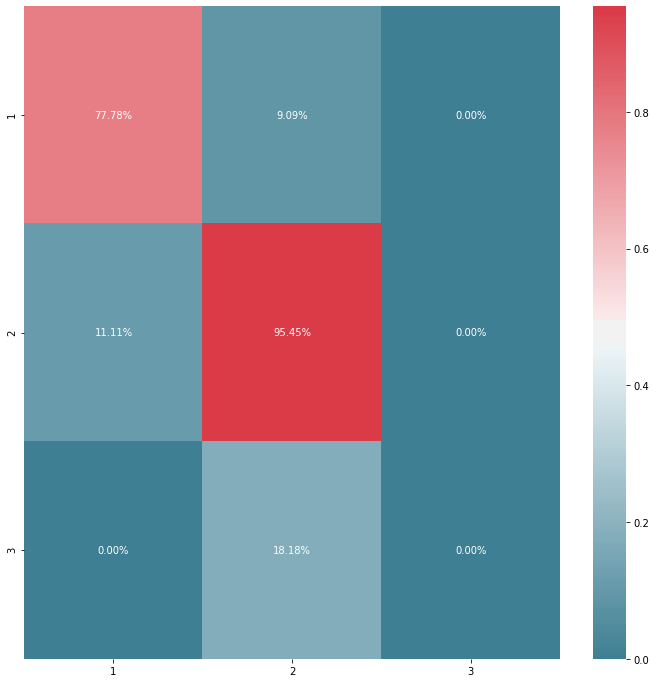

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

cf_df = pd.DataFrame(confusion_matrix(y_test,y_pred), index=[1,2,3], columns=[1,2,3])
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cf_df/np.sum(cf_df,axis=1), annot=True, fmt='.2%', cmap=sns.diverging_palette(220, 10, as_cmap=True))

## Clustering

In [0]:
cluster_data = covid_data1[['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'Active Cases', 'Serious_Critical',
       'Cases_per_1Mpop', 'Deaths_per_1Mpop', 'Total Tests', 'Tests_per_1Mpop', 'Avg_LockdownSeverity', 'Score', 'GDP_2018', 'Obesity']]

In [0]:
cluster_data.isna().sum()

Total Cases             0
New Cases               0
Total Deaths            0
New Deaths              0
Total Recovered         0
Active Cases            0
Serious_Critical        0
Cases_per_1Mpop         0
Deaths_per_1Mpop        0
Total Tests             0
Tests_per_1Mpop         0
Avg_LockdownSeverity    0
Score                   0
GDP_2018                2
Obesity                 0
dtype: int64

In [0]:
cluster_data.fillna(cluster_data.GDP_2018.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [0]:
cluster_data.isna().sum()

Total Cases             0
New Cases               0
Total Deaths            0
New Deaths              0
Total Recovered         0
Active Cases            0
Serious_Critical        0
Cases_per_1Mpop         0
Deaths_per_1Mpop        0
Total Tests             0
Tests_per_1Mpop         0
Avg_LockdownSeverity    0
Score                   0
GDP_2018                0
Obesity                 0
dtype: int64

Evaluation: Elbow Method

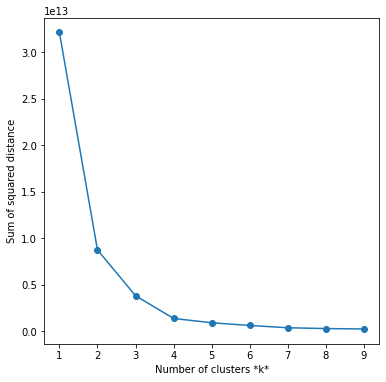

In [0]:
#deciding how many clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(cluster_data)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)

kmeans.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

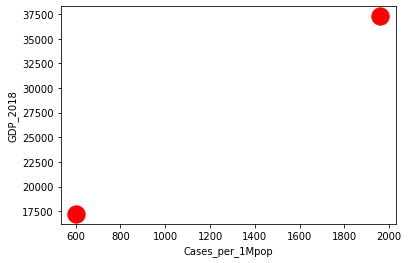

In [0]:
import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_

plt.scatter(kmeans.cluster_centers_[:, 7], kmeans.cluster_centers_[:, 13], s=300, c='red')
plt.xlabel('Cases_per_1Mpop')
plt.ylabel('GDP_2018')
plt.show()

## **SVM on Quality_Life_Ranking (just trial)**

In [0]:
covid_data1.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious_Critical,Cases_per_1Mpop,Deaths_per_1Mpop,Total Tests,Tests_per_1Mpop,Continent,CountryCode,Avg_LockdownSeverity,Score,Quality_Life,GDP_2018,Obesity,Elder,Social support,Freedom,Corruption,Generosity,Health,Quality_Life_Ranking,QLRanking_1,QLRanking_2,QLRanking_3,Cont_Africa,Cont_Asia,Cont_Australia/Oceania,Cont_Europe,Cont_North America,Cont_South America
0,Afghanistan,1176,84,40,4,166,970,7,30,1,6422,165,Asia,AFG,53.159184,3.203,39.070423,563.8,5.5,2.584927,151.0,155.0,136.0,137.0,139.0,2,0,1,0,0,1,0,0,0,0
1,Albania,634,25,27,1,356,251,4,220,9,6269,2178,Europe,ALB,65.387678,4.719,39.070423,5075.4,21.7,13.744736,133.0,87.0,134.0,60.0,40.0,2,0,1,0,0,0,0,1,0,0
2,Italy,187327,3370,25085,437,54543,107699,2384,3098,415,1513251,25028,Europe,ITA,63.586470,6.223,22.000000,35391.7,19.9,22.751680,23.0,132.0,128.0,48.0,7.0,1,1,0,0,0,0,0,1,0,0
3,Algeria,2910,99,402,10,1204,1304,40,66,9,6500,148,Africa,DZA,64.404750,5.211,39.070423,4815.6,27.4,6.362497,101.0,149.0,46.0,128.0,78.0,2,0,1,0,1,0,0,0,0,0
4,France,159877,1827,21340,544,40657,97880,5218,2449,327,463662,7103,Europe,FRA,54.233999,6.592,16.000000,43663.6,21.6,20.034625,32.0,69.0,21.0,68.0,5.0,1,1,0,0,0,0,0,1,0,0


In [0]:
covid_data2 = covid_data1[['Score','Quality_Life_Ranking','GDP_2018','Deaths_per_1Mpop',
      'Cases_per_1Mpop','Elder','Obesity','Health','Cont_Africa',	'Cont_Asia','Avg_LockdownSeverity',
      'Cont_Australia/Oceania',	'Cont_Europe',	'Cont_North America',	'Cont_South America']]

In [0]:
from sklearn.svm import LinearSVC

X = covid_data1[['Score','GDP_2018','Deaths_per_1Mpop',
      'Cases_per_1Mpop','Elder','Obesity','Health','Cont_Africa',	'Cont_Asia','Avg_LockdownSeverity',
      'Cont_Australia/Oceania',	'Cont_Europe',	'Cont_North America',	'Cont_South America']]

y = covid_data1['Quality_Life_Ranking']


clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X, y)
LinearSVC(random_state=0, tol=1e-05)
print(clf.coef_)


[[-1.20613742e-03  4.40768573e-05  1.11953626e-03 -1.64221516e-04
  -1.18330414e-03 -3.99875641e-03 -1.14700157e-02  7.44925772e-20
  -3.64177295e-05 -6.74118883e-03  1.32339126e-06 -7.22972175e-07
  -1.46543874e-04 -2.66654143e-05]
 [ 1.39125469e-03  6.61644017e-05  3.29743832e-04  2.18809830e-04
   1.01733866e-03 -1.06273954e-02  6.91758594e-03  4.74427713e-04
  -5.93756367e-04  1.68674456e-03  6.61744490e-24  2.81944519e-05
   4.10943594e-04  9.75825433e-05]
 [-1.04492264e-03 -3.24200305e-05 -2.60903739e-03 -1.02378627e-05
  -4.46194605e-04  1.29383432e-02 -7.34540606e-03 -5.67453821e-04
   6.72295597e-04 -8.01599160e-04 -2.12899820e-06 -2.59968632e-05
  -3.87393073e-04 -7.45206314e-05]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
attributes=['Score','GDP_2018','Deaths_per_1Mpop',
      'Cases_per_1Mpop','Elder','Obesity','Health','Cont_Africa',	'Cont_Asia','Avg_LockdownSeverity',
      'Cont_Australia/Oceania',	'Cont_Europe',	'Cont_North America',	'Cont_South America']
data_dict={'attribute':attributes,"first_layer":clf.coef_[0],"second_layer":clf.coef_[1],"third_layer":clf.coef_[2]}
attribute_for_quality = pd.DataFrame(data_dict)
attribute_for_quality=attribute_for_quality.sort_values(by="second_layer",ascending=False)
attribute_for_quality

,attribute,first_layer,second_layer,third_layer
6,Health,-1.147002e-02,6.917586e-03,-0.007345
9,Avg_LockdownSeverity,-6.741189e-03,1.686745e-03,-0.000802
0,Score,-1.206137e-03,1.391255e-03,-0.001045
4,Elder,-1.183304e-03,1.017339e-03,-0.000446
7,Cont_Africa,7.449258e-20,4.744277e-04,-0.000567
12,Cont_North America,-1.465439e-04,4.109436e-04,-0.000387
2,Deaths_per_1Mpop,1.119536e-03,3.297438e-04,-0.002609
3,Cases_per_1Mpop,-1.642215e-04,2.188098e-04,-0.000010
13,Cont_South America,-2.666541e-05,9.758254e-05,-0.000075
1,GDP_2018,4.407686e-05,6.616440e-05,-0.000032
